### Decision Tree Classifier Implementation With Post Prunning And Preprunning

A Decision Tree Classifier is a popular machine learning algorithm used for both classification and regression tasks. It builds a flowchart-like model of decisions based on feature values to make predictions. The tree consists of internal nodes that represent features, branches that represent decisions based on feature values, and leaf nodes that represent the class labels or predicted values.

Pruning is a technique used to prevent overfitting in decision trees. It reduces the size of the tree by removing unnecessary nodes and branches, thus improving the generalization capabilities of the model. There are two types of pruning techniques commonly used: pre-pruning and post-pruning.

1. Pre-pruning: Pre-pruning involves setting conditions to limit the growth of the tree during the construction phase. It stops the tree from expanding when certain stopping criteria are met. Some common pre-pruning techniques include:

- Maximum Depth: Limiting the maximum depth of the tree. Once the depth reaches a specified value, further splitting stops.
- Minimum Samples for Split: Specifying a minimum number of samples required to split a node. If the number of samples is below this threshold, the node becomes a leaf node.
- Minimum Samples per Leaf: Specifying a minimum number of samples required to be present in each leaf node. If the number of samples is below this threshold after a split, the split is not performed.

2. Post-pruning: Post-pruning involves growing the tree to its maximum potential and then pruning back the unnecessary branches. The decision on whether to prune a node is made by evaluating the impact of removing that node on the performance of the tree. One common post-pruning technique is:

- Cost Complexity Pruning (also known as Minimal Cost-Complexity Pruning or Alpha Pruning): This method assigns a cost parameter, often denoted by alpha, to each node based on its error rate and the number of samples it represents. By varying the value of alpha, the complexity of the tree can be controlled. Pruning decisions are made by comparing the overall cost of the pruned tree with the original tree.

Implementing a Decision Tree Classifier with pruning involves using a machine learning library or framework that supports these techniques. Some popular libraries that provide decision tree implementations with pruning capabilities include scikit-learn (Python), Weka (Java), and C4.5 (C++). The specific implementation details can vary depending on the library or framework you choose to work with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
## Independent and dependent features

X = df.iloc[:,:-1]
y = dataset.target

In [9]:
## Train test split

from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
classifier = DecisionTreeClassifier(criterion = 'entropy')

In [13]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.4444444444444444, 0.9285714285714286, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

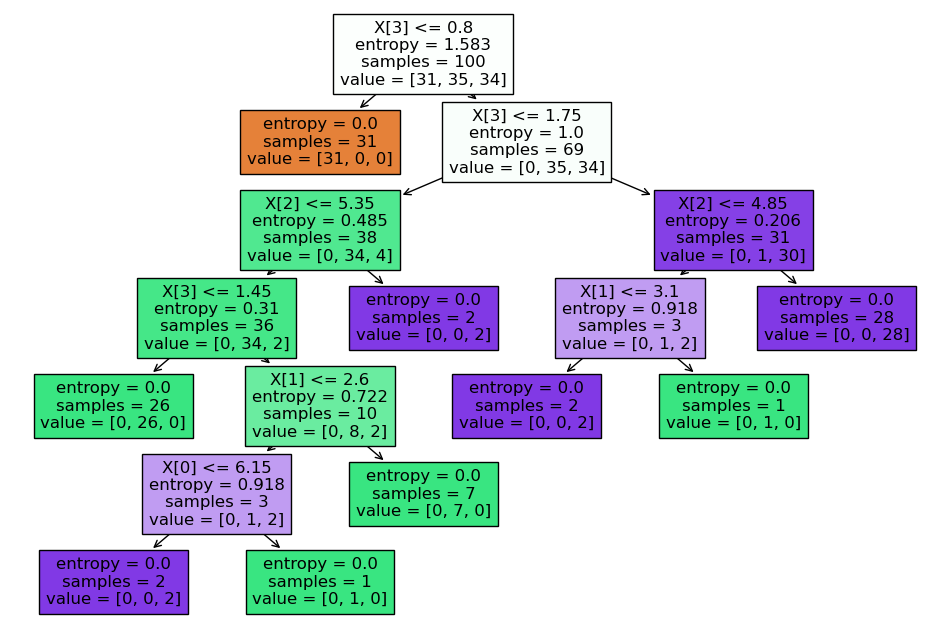

In [15]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier,filled = True)

In [16]:
## Post Prunning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

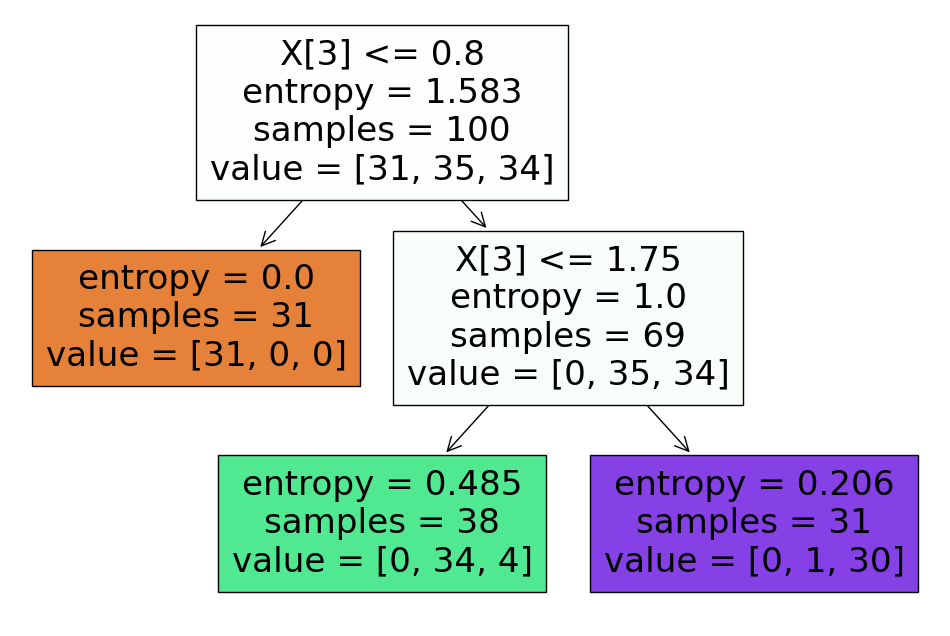

In [17]:
plt.figure(figsize=(12,8))
tree.plot_tree(classifier,filled = True)

In [18]:
## Prediction
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
score = accuracy_score(y_pred,y_test)
report = classification_report(y_pred,y_test)

In [22]:
print(score)
print(report)

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

When dealing with huge datasets, DecisionTree models can be computationally expensive and prone to overfitting. To mitigate these issues, prepruning and hyperparameter tuning are important techniques to consider. Here's how you can use prepruning and hyperparameter tuning for DecisionTree models on large datasets:

Prepruning:
Prepruning involves setting constraints on the tree-building process to stop the tree from growing too deep or too wide. This helps prevent overfitting and reduces computational complexity. Here are some commonly used prepruning techniques:

a. Maximum depth (max_depth): Limit the maximum depth of the tree. This prevents the tree from becoming overly complex and reduces overfitting.

b. Minimum samples per leaf (min_samples_leaf): Set a minimum threshold for the number of samples required in a leaf node. If splitting a node would result in a smaller number of samples than the threshold, the split is not performed.

c. Maximum number of leaf nodes (max_leaf_nodes): Limit the maximum number of leaf nodes in the tree. This restricts the tree's growth and controls its complexity.

d. Minimum impurity decrease (min_impurity_decrease): Specify a threshold for the minimum impurity decrease required to perform a split. If the impurity decrease is below the threshold, the split is not performed.

These prepruning techniques help control the tree's size and complexity, reducing computational requirements and preventing overfitting.

Hyperparameter Tuning:
Hyperparameter tuning involves optimizing the hyperparameters of the DecisionTree model to achieve better performance. Here's an approach to hyperparameter tuning for large datasets:

a. Randomized Search or Grid Search: Due to the large size of the dataset, it might be impractical to perform an exhaustive search over all possible hyperparameter combinations. Instead, consider using randomized search or grid search to explore a subset of hyperparameter combinations. Randomized search randomly samples a subset of the hyperparameter space, while grid search exhaustively evaluates all specified combinations.

b. Cross-Validation: Use k-fold cross-validation to estimate the model's performance for different hyperparameter settings. Split the dataset into k equally sized folds, train the model on k-1 folds, and evaluate it on the remaining fold. Repeat this process for each combination of hyperparameters and calculate the average performance across all folds. This helps identify the hyperparameters that yield the best performance.

c. Parallelization and Distributed Computing: Utilize parallelization techniques and distributed computing frameworks, such as Apache Spark or Dask, to speed up the hyperparameter tuning process. These frameworks enable distributed training and evaluation, allowing you to leverage the computational power of multiple machines or clusters.

d. Early Stopping: Implement early stopping criteria to halt the hyperparameter search if the model's performance doesn't improve significantly after a certain number of iterations. This helps save computational resources and prevents unnecessary search in unpromising regions of the hyperparameter space.

Hyperparameter tuning requires careful experimentation and consideration of the trade-offs between different hyperparameters. It aims to find the best combination that balances model performance, computational efficiency, and generalization ability.

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [27]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [28]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [29]:
y_pred=clf.predict(X_test)

In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
score = accuracy_score(y_pred,y_test)
report = classification_report(y_pred,y_test)

In [33]:
print(score)
print(report)

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Decision Tree Regressor Implementation

The Decision Tree Regressor is a machine learning algorithm used for regression tasks. It builds a predictive model in the form of a decision tree, where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the output or prediction. The implementation of the Decision Tree Regressor involves several steps:

1. Data Preparation: Prepare your dataset by cleaning and preprocessing the data. Ensure that the target variable is continuous, as the Decision Tree Regressor is suitable for regression tasks.

2. Feature Selection: Select the relevant features that will be used to train the decision tree. This step helps to improve the model's accuracy and reduce overfitting.

3. Training the Decision Tree: Use the training data to build the decision tree model. The algorithm recursively splits the data based on different features to minimize the variance of the target variable.

4. Splitting Criteria: Determine the splitting criteria for each internal node. Common measures for regression tasks include mean squared error (MSE) or mean absolute error (MAE). These criteria help to evaluate the quality of a split at each node.

5. Pruning (Optional): Pruning is a technique to avoid overfitting by reducing the complexity of the decision tree. It involves removing unnecessary nodes or branches that do not contribute significantly to the model's performance.

6. Prediction: Once the decision tree is trained, it can be used to make predictions on new, unseen data. Each instance traverses the decision tree based on the feature values until it reaches a leaf node, which provides the predicted output.

7. Evaluation: Evaluate the performance of the decision tree regressor using appropriate metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared.

8. Hyperparameter Tuning: Fine-tune the hyperparameters of the decision tree regressor to optimize its performance. Parameters such as the maximum depth of the tree, minimum samples required to split a node, or the maximum number of leaf nodes can be adjusted.

9. Deployment: Once the decision tree regressor is trained and evaluated, it can be deployed to make predictions on new, unseen data in real-world applications.

There are several libraries and frameworks available in various programming languages, such as scikit-learn in Python, that provide ready-to-use implementations of the Decision Tree Regressor algorithm. These libraries simplify the implementation process by providing pre-built functions and classes for training, testing, and using decision tree regressor models.

In [34]:
##California House Pricing Dataset

from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [35]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
df = pd.DataFrame(california_df.data, columns = california_df.feature_names)

In [38]:
df['Target'] = california_df.target

In [39]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [40]:
df.shape

(20640, 9)

In [41]:
## Taking Sample Data

df=df.sample(frac=0.25)

In [43]:
df.shape

(5160, 9)

In [44]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
14128,1.2286,28.0,3.080808,0.987374,1286.0,3.247475,32.75,-117.09,1.050
42,1.0250,49.0,3.772487,1.068783,462.0,2.444444,37.84,-122.26,1.188
4876,1.2989,25.0,2.980932,1.165254,1193.0,2.527542,34.03,-118.28,2.250
542,5.1702,18.0,4.333333,1.150830,1243.0,1.874811,37.76,-122.29,2.654
15642,3.3643,52.0,4.161593,1.138173,932.0,2.182670,37.80,-122.42,4.200
...,...,...,...,...,...,...,...,...,...
4546,1.6250,26.0,4.000000,1.000000,35.0,3.888889,34.02,-118.20,1.750
6623,3.9688,52.0,5.167173,0.963526,996.0,3.027356,34.18,-118.14,1.750
16269,1.9402,46.0,4.990025,1.067332,1384.0,3.451372,37.95,-121.25,0.622
13744,3.0651,24.0,5.468386,1.027454,2904.0,2.415973,34.07,-117.17,1.080


In [47]:
## Independant and dependant features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14128,1.2286,28.0,3.080808,0.987374,1286.0,3.247475,32.75,-117.09
42,1.0250,49.0,3.772487,1.068783,462.0,2.444444,37.84,-122.26
4876,1.2989,25.0,2.980932,1.165254,1193.0,2.527542,34.03,-118.28
542,5.1702,18.0,4.333333,1.150830,1243.0,1.874811,37.76,-122.29
15642,3.3643,52.0,4.161593,1.138173,932.0,2.182670,37.80,-122.42


In [54]:
y.head()

14128    1.050
42       1.188
4876     2.250
542      2.654
15642    4.200
Name: Target, dtype: float64

In [56]:
## Train Split Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
regressor = DecisionTreeRegressor()

In [59]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
y_pred = regressor.predict(X_test)

In [61]:
y_pred

array([3.699  , 0.818  , 5.00001, ..., 1.594  , 1.414  , 3.074  ])

In [62]:
from sklearn.metrics import r2_score

In [64]:
score = r2_score(y_pred, y_test)

In [65]:
score

0.5015294556337442

In [66]:
## Hyperparameter Tunning

parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

https://scikit-learn.org/stable/modules/model_evaluation.html

In [67]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [68]:
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [69]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [70]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [71]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

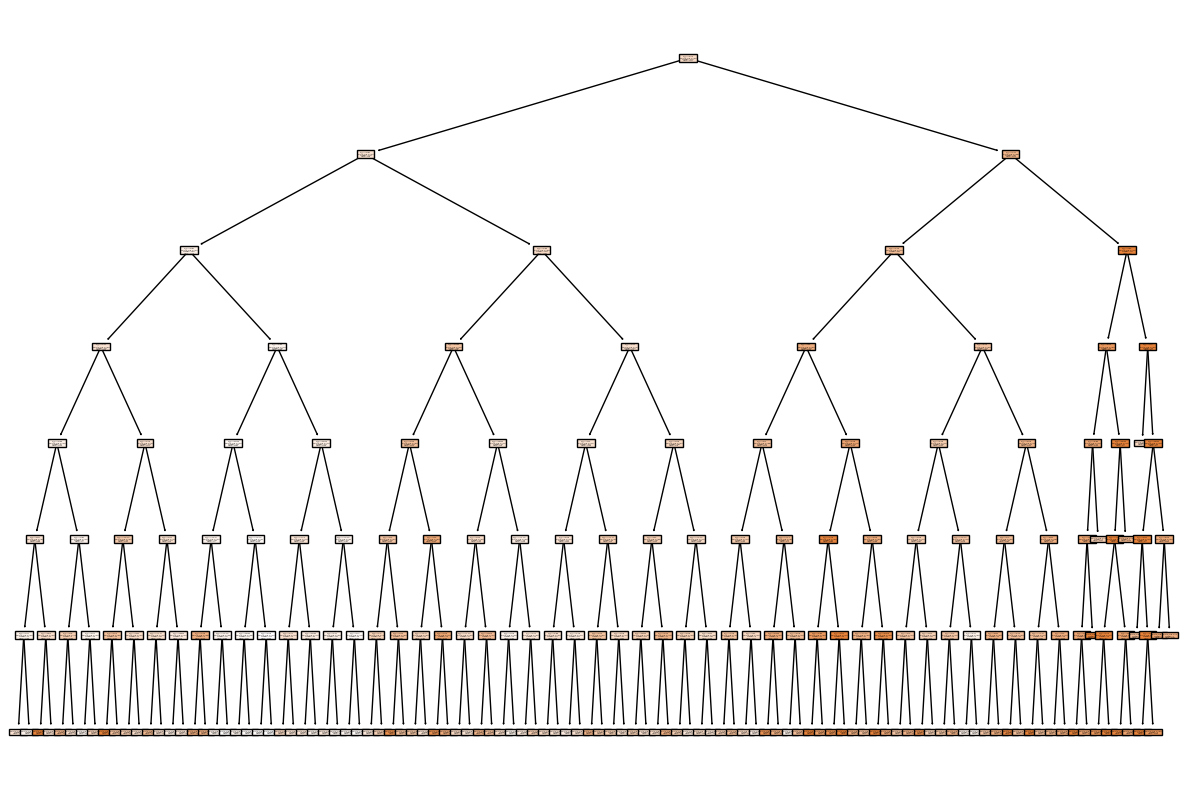

In [73]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled = True )
plt.show()

In [74]:
y_pred = regressor.predict(X_test)

In [75]:
r2_score(y_pred, y_test)

0.48634875354602913